# <span style="color:red"> Numerical Simulation 6 </span>

## Exercise 6.1

#### <span style="color:black"> Objective </span>

In this exercise we wanted to perform a simulation of the ising model $1d$ with neighbors interaction at different temperature with $N=50$ spins and $J=1$. In particular the quantity of interest were:

- internal energy $U$ 
- heat capacity $C$
- magnetic susceptibility $\chi$
- magnetization $M$ with $h=0.02$

We had to make a picture for each of this quantity obtained with metropolis algorithm or gibbs algorithm and compare with the theoretical expected curve.

#### <span style="color:black"> Implementing restart option and measure </span>

The chanche of restarting with a reading of old spin configuration was made possible by a boolean-type input variable and a corresponding input file. The old configuration is printed at every simulation by use of a function called $ConfFinal$ but the bool variable decide if we will make use of it or not. The standard choiche is that the program will restart from old spin configuration if we don't want it we have to manually force the bool variable in the "bool.dat" file to false.

The measure of heat capacity, magnetic susceptibility and magnetization followed the scheme of given code, I've added only inside $measure$ function the calculus of variable needed for these quantities and inside $averages$ the evaluation of averages of $C$, $\chi$ and $M$ with the following recipes:
- $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
- $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
- $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$


#### <span style="color:black"> Making of the simulation </span>

I've worked with $\mu_B=1$ and $k_B=1$.

The steps of the simulation simulation were made with two different method:
- Metropolis sampling algorithm: the step consisted in trying to flip one time all the spins of the system, chosen randomly, and accepting the flip if the energy of the new flipped spin was fewer of the previous, or with a probability $A(new|old) = \exp(-\beta (H_{new}-H_{old}))$. So the move can be accepted or not.
- Gibbs sampling algorithm: here the move is always accepted. Indeed once I have selected a spin, regardless of the value it had before, I compute the energy for this spin to be up or down, and the relative probability $p_{\pm}=\frac{1}{1+\exp(-\beta (H_{\mp}-H_{\pm}))}$. Once I have this two bins of probability (whose sum is 1) it's easy to randomly generate a number in $[0,1]$ and depending on in which bin it "hit" makes the spin up or down. A Monte Carlo step is where I've done this thing on all the spins in my configuration.

The interval of temperature that we must sample is, in kelvin, $[0.5,2]$. Every point, with his error, is obtained from a complete simulation at fixed temperature. At first my temperature delta between two simulation was $0.1 K$, this means $15$ points. This sampling was good enough for temperature $>1K$ where all the function didn't display a complex behaviour with both changes in first and second derivative. Under $1K$ I made step of $0.05K$ between two simulations.

For every point I followed two step: 
- Equilibrate the system letting make some step without any measure
- Make the real simulation starting from last configuration after the equilibration and taking measure.

All the simulation was set up with M=200000 steps and N=20 blocks. 

#### <span style="color:black"> Result </span>

As It showed below the point are in good accord with expected curve for every quantity. It is also trivial to see that at low temperature the value are less accurate but due to the increase in uncertainty they are still compatible. I didn't find any difference in the result between the two methods while I recognized a dependence of the result from the generator's seed. 

**Internal energy**

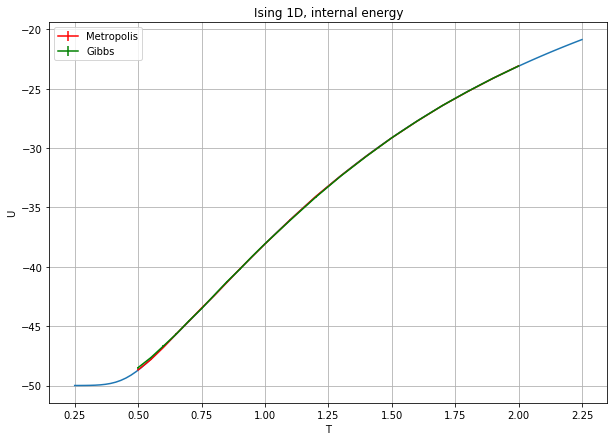

In [13]:
import numpy as np
import matplotlib.pyplot as plt
points=100
T = np.linspace(0.25,2.25,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

t, ave, err=np.loadtxt("ene_m", unpack=True)
fig=plt.figure(figsize=(10,7))
plt.plot(T, e*Ns)
plt.errorbar(t, ave, yerr=err,color="red", label="Metropolis")

t, ave, err=np.loadtxt("ene_g", unpack=True)
plt.errorbar(t, ave, yerr=err,color="green", label="Gibbs")

plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U')
plt.legend()
plt.grid(True)
plt.show()

**Heat capacity**

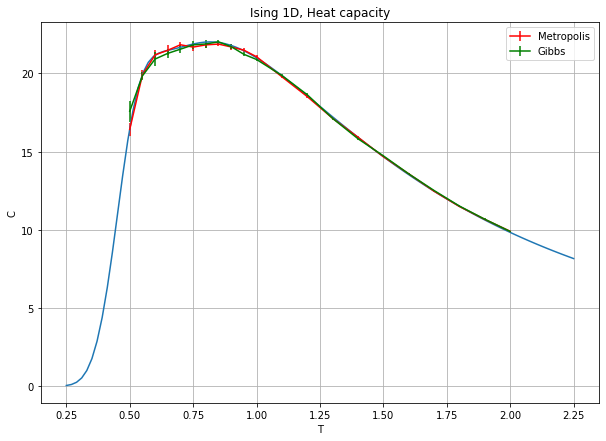

In [5]:
import numpy as np
import matplotlib.pyplot as plt
points=100
T = np.linspace(0.25,2.25,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

t, ave, err=np.loadtxt("heat_m", unpack=True)
fig=plt.figure(figsize=(10,7))
plt.plot(T, heat*Ns)
plt.errorbar(t, ave, yerr=err,color="red", label="Metropolis")

t, ave, err=np.loadtxt("heat_g", unpack=True)
plt.errorbar(t, ave, yerr=err,color="green", label="Gibbs")

plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C')
plt.legend()
plt.grid(True)
plt.show()

**Magnetization**

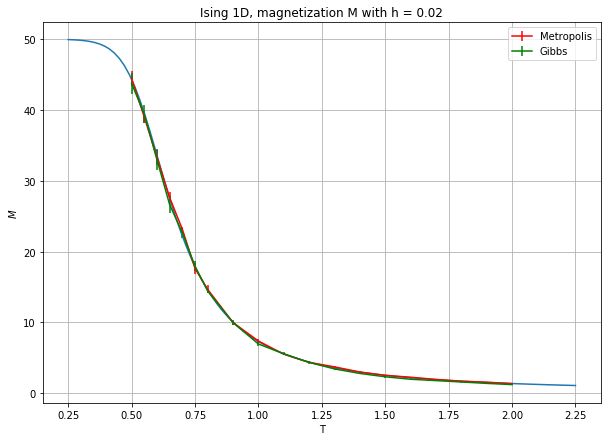

In [6]:
import numpy as np
import matplotlib.pyplot as plt
points=100
T = np.linspace(0.25,2.25,num=points)
J = 1.0
Ns = 50
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

t, ave, err=np.loadtxt("mag_m", unpack=True)
fig=plt.figure(figsize=(10,7))

plt.plot(T, M*Ns)
plt.errorbar(t, ave, yerr=err,color="red", label="Metropolis")

t, ave, err=np.loadtxt("mag_g", unpack=True)
plt.errorbar(t, ave, yerr=err,color="green", label="Gibbs")
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')
plt.legend()
plt.grid(True)
plt.show()

**Magnetic susceptibility**

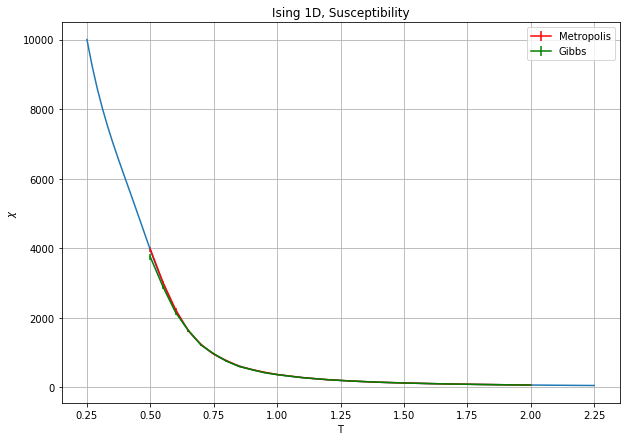

In [18]:
import numpy as np
import matplotlib.pyplot as plt
points=100
T = np.linspace(0.25,2.25,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

t, ave, err=np.loadtxt("chi_m", unpack=True)
fig=plt.figure(figsize=(10,7))
plt.plot(T, X*Ns)
plt.errorbar(t, ave, yerr=err,color="red", label="Metropolis")
t, ave, err=np.loadtxt("chi_g", unpack=True)
plt.errorbar(t, ave, yerr=err,color="green", label="Gibbs")
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.legend()
plt.grid(True)
plt.show()